In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy





In [250]:
day=pd.read_csv("/./Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/Bike-Sharing-Dataset/day.csv",parse_dates=["dteday"])
hour=pd.read_csv("/./Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/Bike-Sharing-Dataset/hour.csv",parse_dates=["dteday"])
trips_2011=pd.read_csv("/./Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/2011-capitalbikeshare-tripdata.csv",parse_dates=["Start date","End date"])
station_loc=pd.read_csv("/./Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/Capital_Bike_Share_Locations_updated2.csv",delimiter=";")

In [251]:
station_loc=station_loc.iloc[:,0:9]

In [252]:
station_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               695 non-null    float64
 1   Y               695 non-null    float64
 2   OBJECTID        690 non-null    float64
 3   LATITUDE        695 non-null    float64
 4   LONGITUDE       695 non-null    float64
 5   NAME            695 non-null    object 
 6   STATION_TYPE    695 non-null    object 
 7   STATION_ID      690 non-null    float64
 8   STATION_STATUS  690 non-null    object 
dtypes: float64(6), object(3)
memory usage: 49.0+ KB


In [253]:
# Bike trips 2012
files_2012=glob.glob("/Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/2012-capitalbikeshare-tripdata/*.csv")
trips_2012=pd.DataFrame()
for file in files_2012:
    data=pd.read_csv(file,parse_dates=["Start date","End date"])
    data["filename"]=file
    trips_2012=pd.concat([trips_2012,data])


In [254]:
trips=trips_2011.append(trips_2012)

/var/folders/bn/ghpvp69d0vd0t7sb_kbnxzqw0000gn/T/ipykernel_79352/2382772095.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips=trips_2011.append(trips_2012)


In [255]:
trips.shape

(3255678, 10)

In [256]:
day.shape

(731, 16)

In [257]:
day.info()
day.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [258]:
hour.shape

(17379, 17)

In [259]:
hour.info()
hour.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [260]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [261]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [262]:
hour.loc[hour["season"]==1,"season"]="Winter"
hour.loc[hour["season"]==2,"season"]="Spring"
hour.loc[hour["season"]==3,"season"]="Summer"
hour.loc[hour["season"]==4,"season"]="Fall"

day.loc[day["season"]==1,"season"]="Winter"
day.loc[day["season"]==2,"season"]="Spring"
day.loc[day["season"]==3,"season"]="Summer"
day.loc[day["season"]==4,"season"]="Fall"


In [263]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255678 entries, 0 to 566831
Data columns (total 10 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
 9   filename              object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 273.2+ MB


In [264]:
trips.isna().sum()

Duration                      0
Start date                    0
End date                      0
Start station number          0
Start station                 0
End station number            0
End station                   0
Bike number                   0
Member type                   0
filename                1226767
dtype: int64

In [265]:
trips.isnull().sum()

Duration                      0
Start date                    0
End date                      0
Start station number          0
Start station                 0
End station number            0
End station                   0
Bike number                   0
Member type                   0
filename                1226767
dtype: int64

In [266]:
trips.drop(columns=["filename"],inplace=True)


DATE TIME

In [267]:
pd.to_datetime(hour["dteday"])

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]

In [268]:
pd.to_datetime(trips["Start date"])
pd.to_datetime(trips["End date"])

0        2011-01-01 01:00:37
1        2011-01-01 00:08:32
2        2011-01-01 00:15:36
3        2011-01-01 00:16:36
4        2011-01-01 00:32:19
                 ...        
566827   2012-07-01 00:00:52
566828   2012-07-01 00:21:18
566829   2012-07-01 00:06:19
566830   2012-07-01 00:15:21
566831   2012-07-01 00:10:18
Name: End date, Length: 3255678, dtype: datetime64[ns]

In [269]:
trips["mnth"]=pd.DatetimeIndex(trips["Start date"]).month
trips["weekday"]=pd.DatetimeIndex(trips["Start date"]).weekday
trips["dteday"]=pd.DatetimeIndex(trips["Start date"]).date
trips["hour"]=trips["Start date"].dt.hour


In [270]:
# Day time
# Trips data set
trips["day_time"]=trips["hour"]

trips["day_time"]=np.where((trips["hour"]>=0)&(trips["hour"]<5),"Night",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=5)&(trips["hour"]<7),"Early morning",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=7)&(trips["hour"]<12),"Morning",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=12)&(trips["hour"]<17),"Afternoon",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=17)&(trips["hour"]<21),"Evening",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=21)&(trips["hour"]<24),"Night",trips["day_time"])


# Hour data set

hour["day_time"]=hour["hr"]

hour["day_time"]=np.where((hour["hr"]>=0)&(hour["hr"]<5),"Night",hour["day_time"])
hour["day_time"]=np.where((hour["hr"]>=5)&(hour["hr"]<7),"Early morning",hour["day_time"])
hour["day_time"]=np.where((hour["hr"]>=7)&(hour["hr"]<12),"Morning",hour["day_time"])
hour["day_time"]=np.where((hour["hr"]>=12)&(hour["hr"]<17),"Afternoon",hour["day_time"])
hour["day_time"]=np.where((hour["hr"]>=17)&(hour["hr"]<21),"Evening",hour["day_time"])
hour["day_time"]=np.where((hour["hr"]>=21)&(hour["hr"]<24),"Night",hour["day_time"])


In [271]:
trips["dteday"]=pd.to_datetime(trips["dteday"])

In [272]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255678 entries, 0 to 566831
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
 9   mnth                  int64         
 10  weekday               int64         
 11  dteday                datetime64[ns]
 12  hour                  int64         
 13  day_time              object        
dtypes: datetime64[ns](3), int64(6), object(5)
memory usage: 372.6+ MB


In [273]:

# HOUR DF
hour["season"]=pd.Categorical(hour["season"],categories=("Winter","Spring","Summer","Fall"))
hour["is_holiday"]=hour["holiday"]
hour.loc[hour["is_holiday"]==1,"is_holiday"]="Yes"
hour.loc[hour["is_holiday"]==0,"is_holiday"]="No"
hour["is_holiday"]=pd.Categorical(hour["is_holiday"],categories=("Yes","No"))

#DAY DF

day["season"]=pd.Categorical(day["season"],categories=("Winter","Spring","Summer","Fall"))
day["is_holiday"]=day["holiday"]
day.loc[day["is_holiday"]==1,"is_holiday"]="Yes"
day.loc[day["is_holiday"]==0,"is_holiday"]="No"
day["is_holiday"]=pd.Categorical(day["is_holiday"],categories=("Yes","No"))


#TRIPS DF

trips["season"]=trips["mnth"]
trips["season"].replace({1:"Winter",2:"Winter",3:"Spring",4:"Spring",5:"Spring",6:"Summer",7:"Summer",8:"Summer",9:"Fall",10:"Fall",11:"Fall",12:"Winter"},inplace=True)
trips["season"]=pd.Categorical(trips["season"],categories=("Winter","Spring","Summer","Fall"))


In [274]:
# Normalised values to meaningful values

# HOUR DF
hour["tem_cel"]=np.ceil(hour["temp"]*47-8).astype(int)
hour["atemp_cel"]=np.ceil(hour["temp"]*66-16).astype(int)
hour["windspeed_"]=np.ceil(hour["windspeed"]*67).astype(int)

# DAY DF
day["tem_cel"]=np.ceil(day["temp"]*47-8).astype(int)
day["atemp_cel"]=np.ceil(day["temp"]*66-16).astype(int)
day["windspeed_"]=np.ceil(day["windspeed"]*67).astype(int)


In [275]:
#weekday name

hour["day_name"]=hour["weekday"]
hour["day_name"].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"},inplace=True)
trips["day_name"]=trips["weekday"]
trips["day_name"].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"},inplace=True)

In [276]:
# Holiday colummn for "Trips" dataset
holiday_list=day[["dteday","holiday","is_holiday"]]
trips=pd.merge(trips,holiday_list,on="dteday",how="left")

In [277]:
trips.loc[trips["Member type"]=="Member","Member type"]="registered"
trips.loc[trips["Member type"]=="Casual","Member type"]="casual"

In [278]:
trips["route"]=trips["Start station"]+" - "+trips["End station"]

In [279]:
# Replace Unknown memeber type (<1%)
trips["Member type"].replace({"Unknown":"casual"},inplace=True)

In [280]:
trips.head(5)

Duration          Start date            End date  Start station number  \
0      3548 2011-01-01 00:01:29 2011-01-01 01:00:37                 31620   
1       346 2011-01-01 00:02:46 2011-01-01 00:08:32                 31105   
2       562 2011-01-01 00:06:13 2011-01-01 00:15:36                 31400   
3       434 2011-01-01 00:09:21 2011-01-01 00:16:36                 31111   
4       233 2011-01-01 00:28:26 2011-01-01 00:32:19                 31104   

                    Start station  End station number  \
0                   5th & F St NW               31620   
1            14th & Harvard St NW               31101   
2  Georgia & New Hampshire Ave NW               31104   
3                  10th & U St NW               31503   
4     Adams Mill & Columbia Rd NW               31106   

                   End station Bike number Member type  mnth  weekday  \
0                5th & F St NW      W00247  registered     1        5   
1               14th & V St NW      W00675      casual     1        5   
2  Adams Mill & Columbia Rd NW      W00357  registered     1        5   
3        Florida Ave & R St NW      W00970  registered     1        5   
4     Calvert & Biltmore St NW      W00346      casual     1        5   

      dteday  hour day_time  season day_name  holiday is_holiday  \
0 2011-01-01     0    Night  Winter      Fri        0         No   
1 2011-01-01     0    Night  Winter      Fri        0         No   
2 2011-01-01     0    Night  Winter      Fri        0         No   
3 2011-01-01     0    Night  Winter      Fri        0         No   
4 2011-01-01     0    Night  Winter      Fri        0         No   

                                               route  
0                      5th & F St NW - 5th & F St NW  
1              14th & Harvard St NW - 14th & V St NW  
2  Georgia & New Hampshire Ave NW - Adams Mill & ...  
3             10th & U St NW - Florida Ave & R St NW  
4  Adams Mill & Columbia Rd NW - Calvert & Biltmo...

In [281]:
hour.describe()

instant            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357      0.192556      0.171850   
min        0.000000      0.000000      1.000000      0.020000      0.000000   
25%        1.000000      0.000000      1.000000      0.340000      0.333300   
50%        3.000000      1.000000      1.000000      0.500000      0.484800   
75%        5.000000      1.000000      2.000000      0.660000      0.621200   
max        6.000000      1.000000      4.000000      1.000000      1.000000   

                hum     windspeed        casual    registered           cnt  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.627229      0.190098     35.676218    153.786869    189.463088   
std        0.192930      0.122340     49.305030    151.357286    181.387599   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%        0.480000      0.104500      4.000000     34.000000     40.000000   
50%        0.630000      0.194000     17.000000    115.000000    142.000000   
75%        0.780000      0.253700     48.000000    220.000000    281.000000   
max        1.000000      0.850700    367.000000    886.000000    977.000000   

            tem_cel     atemp_cel    windspeed_  
count  17379.000000  17379.000000  17379.000000  
mean      15.872375     17.280166     13.239945  
std        9.033183     12.696745      8.269943  
min       -7.000000    -14.000000      0.000000  
25%        8.000000      7.000000      8.000000  
50%       16.000000     17.000000     13.000000  
75%       24.000000     28.000000     17.000000  
max       39.000000     50.000000     57.000000

In [282]:
trips.describe()

Duration  Start station number  End station number          mnth  \
count  3.255678e+06          3.255678e+06        3.255678e+06  3.255678e+06   
mean   1.084497e+03          3.128974e+04        3.129182e+04  6.936537e+00   
std    2.100267e+03          1.931212e+02        1.923761e+02  3.037865e+00   
min    6.000000e+01          3.100000e+04        3.100000e+04  1.000000e+00   
25%    3.990000e+02          3.120000e+04        3.120100e+04  5.000000e+00   
50%    6.580000e+02          3.122600e+04        3.122500e+04  7.000000e+00   
75%    1.092000e+03          3.140100e+04        3.140200e+04  9.000000e+00   
max    8.635500e+04          3.180600e+04        3.180600e+04  1.200000e+01   

            weekday          hour       holiday  
count  3.255678e+06  3.255678e+06  3.255678e+06  
mean   2.998742e+00  1.415391e+01  2.382514e-02  
std    1.974851e+00  5.033927e+00  1.525041e-01  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    1.000000e+00  1.000000e+01  0.000000e+00  
50%    3.000000e+00  1.500000e+01  0.000000e+00  
75%    5.000000e+00  1.800000e+01  0.000000e+00  
max    6.000000e+00  2.300000e+01  1.000000e+00

In [283]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255678 entries, 0 to 3255677
Data columns (total 19 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
 9   mnth                  int64         
 10  weekday               int64         
 11  dteday                datetime64[ns]
 12  hour                  int64         
 13  day_time              object        
 14  season                category      
 15  day_name              object        
 16  holiday               int64         
 17  is_holiday            category      
 18  route                 object        
dtype

In [284]:
# Weather score
hour["hum_score"]=hour["hum"]
hour["temp_score"]=hour["tem_cel"]
hour["wind_score"]=hour["windspeed_"]


hour["hum_score"]=np.where(hour["hum_score"]>=0.78,4,hour["hum_score"])
hour["hum_score"]=np.where((hour["hum_score"]>=0.63)&(hour["hum_score"]<0.78),3,hour["hum_score"])
hour["hum_score"]=np.where((hour["hum_score"]>=0.48)&(hour["hum_score"]<0.63),2,hour["hum_score"])
hour["hum_score"]=np.where(hour["hum_score"]<0.48,1,hour["hum_score"])


hour["temp_score"]=np.where((hour["temp_score"]>=0)&(hour["temp_score"]<10),3,hour["temp_score"])
hour["temp_score"]=np.where((hour["temp_score"]>=10)&(hour["temp_score"]<16),2,hour["temp_score"])
hour["temp_score"]=np.where((hour["temp_score"]>=25)&(hour["temp_score"]<30),2,hour["temp_score"])
hour["temp_score"]=np.where((hour["temp_score"]>=16)&(hour["temp_score"]<25),1,hour["temp_score"])
hour["temp_score"]=np.where(hour["temp_score"]>=30,4,hour["temp_score"])
hour["temp_score"]=np.where(hour["temp_score"]<0,4,hour["temp_score"])


hour["wind_score"]=np.where((hour["wind_score"]>=0)&(hour["wind_score"]<13),1,hour["wind_score"])
hour["wind_score"]=np.where((hour["wind_score"]>=13)&(hour["wind_score"]<25),2,hour["wind_score"])
hour["wind_score"]=np.where((hour["wind_score"]>=25)&(hour["wind_score"]<39),3,hour["wind_score"])
hour["wind_score"]=np.where((hour["wind_score"]>=39),4,hour["wind_score"])

hour["weather_score"]=((hour["temp_score"]*0.4)+(hour["hum_score"]*0.3)+(hour["wind_score"]*0.1)+(hour["weathersit"]*0.2))


EDA (HOUR DF)

<AxesSubplot:xlabel='dteday', ylabel='cnt'>

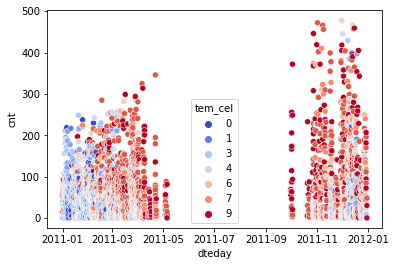

In [285]:
DF_temp_score3=hour.loc[((hour["tem_cel"]>=0) & (hour["tem_cel"]<10))]
sns.scatterplot(data=DF_temp_score3[DF_temp_score3["yr"]==0],y="cnt",x="dteday",hue="tem_cel",palette="coolwarm")

Impact of the weather condition  on the amount of trips

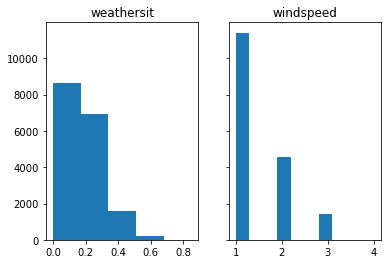

In [286]:

fig,axs=plt.subplots(1,2,sharey=True)
axs[0].set_title("weathersit")
axs[1].set_title("windspeed")

axs[0].hist(hour["windspeed"],bins=5)
axs[1].hist(hour["weathersit"],bins=10)

plt.show()

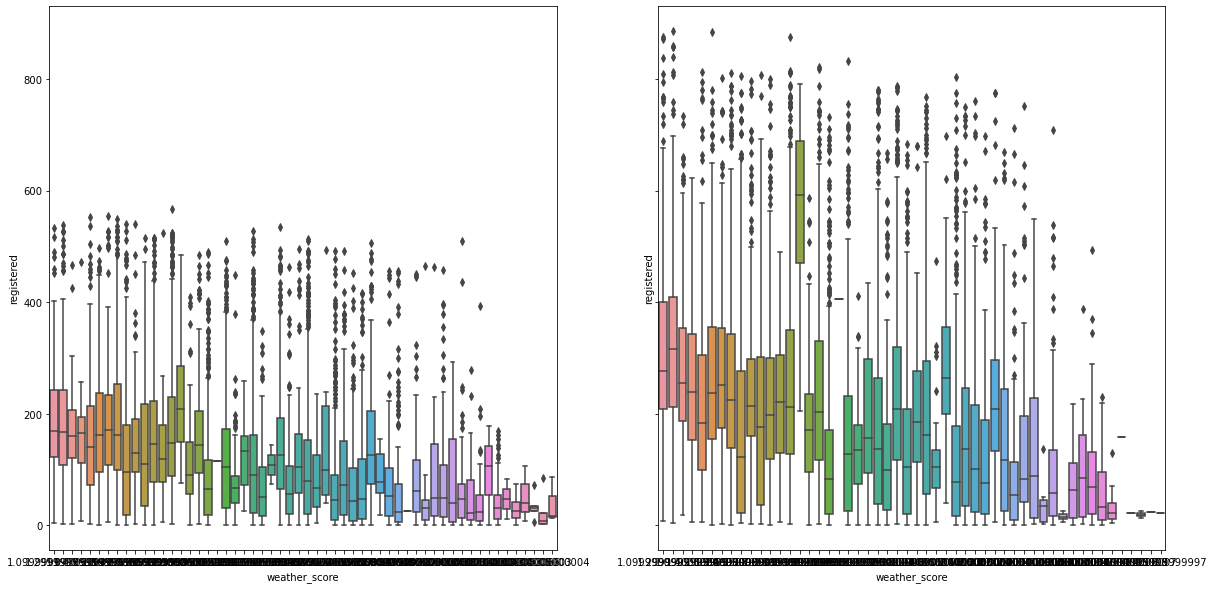

In [287]:

fig,axs=plt.subplots(1,2,figsize=(20,10),sharey=True)
axs[0].set_xlim(1,4)
axs[0].set_xticks(range(1,4))
axs[1].set_xlim(1,4)
axs[1].set_xticks(range(1,4))
sns.boxplot(data=hour[hour["yr"]==0],y="registered",x="weather_score",ax=axs[0])
sns.boxplot(data=hour[hour["yr"]==1],y="registered",x="weather_score",ax=axs[1])
plt.show()

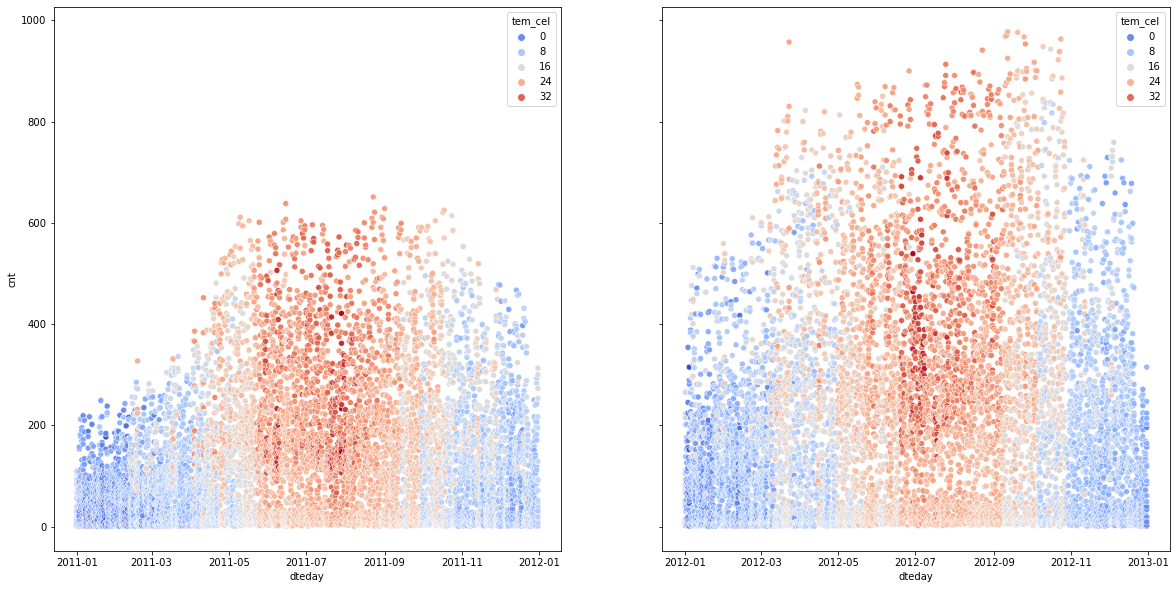

In [288]:

fig,axs=plt.subplots(1,2,figsize=(20,10),sharey=True)

sns.scatterplot(data=hour[hour["yr"]==0],y="cnt",x="dteday",hue="tem_cel",palette="coolwarm",ax=axs[0])
sns.scatterplot(data=hour[hour["yr"]==1],y="cnt",x="dteday",hue="tem_cel",palette="coolwarm",ax=axs[1])
plt.show()

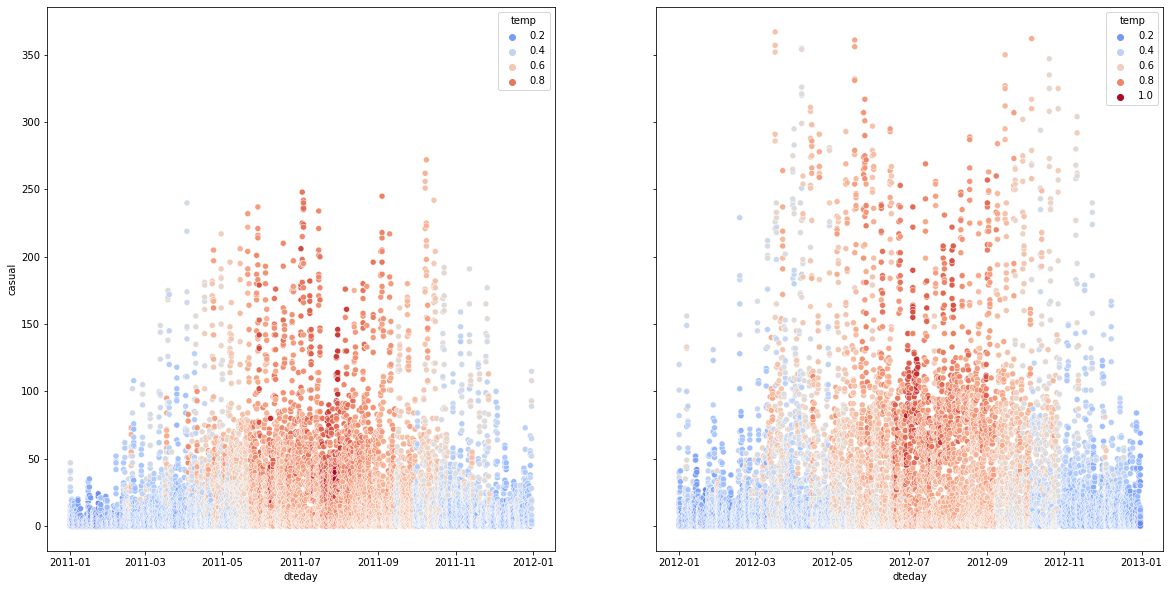

In [289]:
fig,axs=plt.subplots(1,2,figsize=(20,10),sharey=True)

sns.scatterplot(data=hour[hour["yr"]==0],y="casual",x="dteday",hue="temp",palette="coolwarm",ax=axs[0])
sns.scatterplot(data=hour[hour["yr"]==1],y="casual",x="dteday",hue="temp",palette="coolwarm",ax=axs[1])
plt.show()

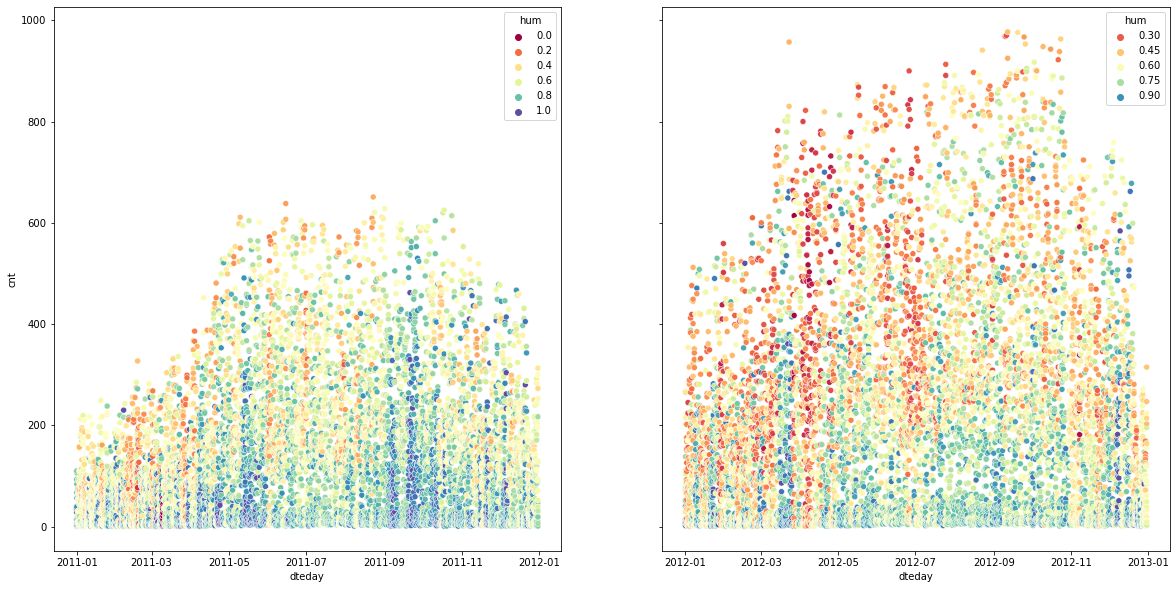

In [290]:

fig,axs=plt.subplots(1,2,figsize=(20,10),sharey=True)


sns.scatterplot(data=hour[hour["yr"]==0],y="cnt",x="dteday",hue="hum",palette="Spectral",ax=axs[0],hue_order=range(0,1))
sns.scatterplot(data=hour[hour["yr"]==1],y="cnt",x="dteday",hue="hum",palette="Spectral",ax=axs[1],hue_order=range(0,1))
plt.show()

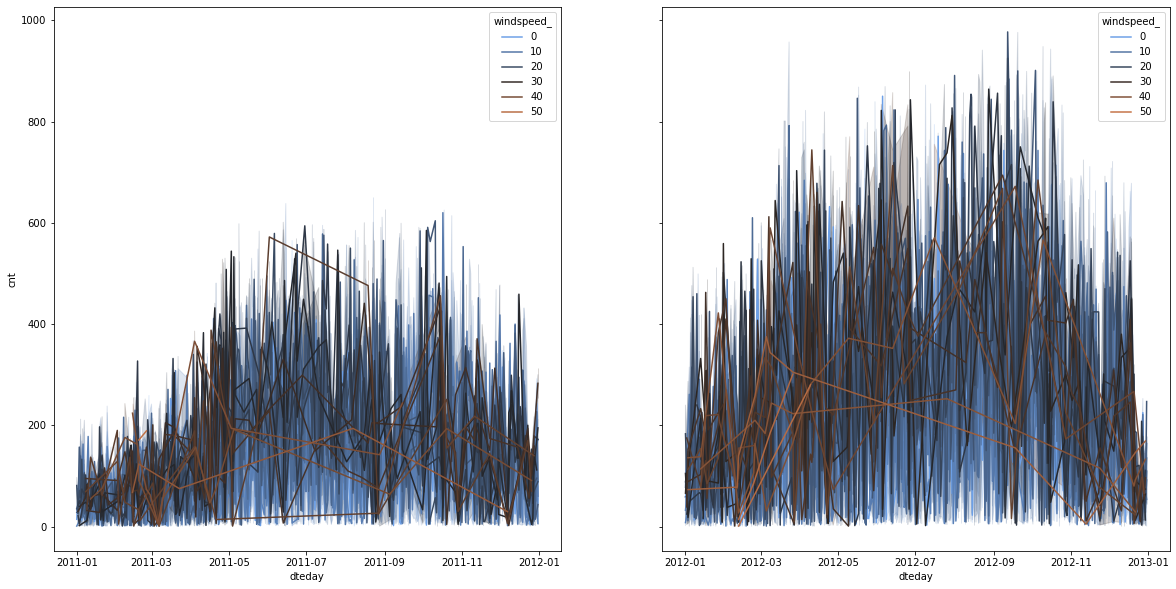

In [291]:
fig,axs=plt.subplots(1,2,figsize=(20,10),sharey=True)

my_palette=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

sns.lineplot(data=hour[hour["yr"]==0],y="cnt",x="dteday",hue="windspeed_",palette=my_palette,ax=axs[0],hue_order=range(0,60))
sns.lineplot(data=hour[hour["yr"]==1],y="cnt",x="dteday",hue="windspeed_",palette=my_palette,ax=axs[1],hue_order=range(0,60))
plt.show()

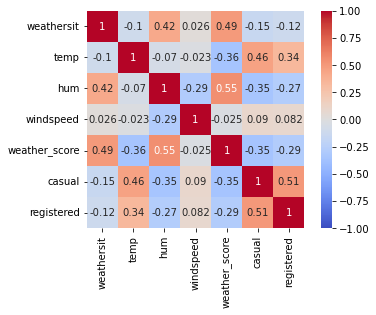

In [292]:

weather=hour[["weathersit","temp","hum","windspeed","weather_score","casual","registered"]].copy()

matrix_weather=weather.corr()

sns.heatmap(data=matrix_weather,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=True,annot=True )
plt.show()

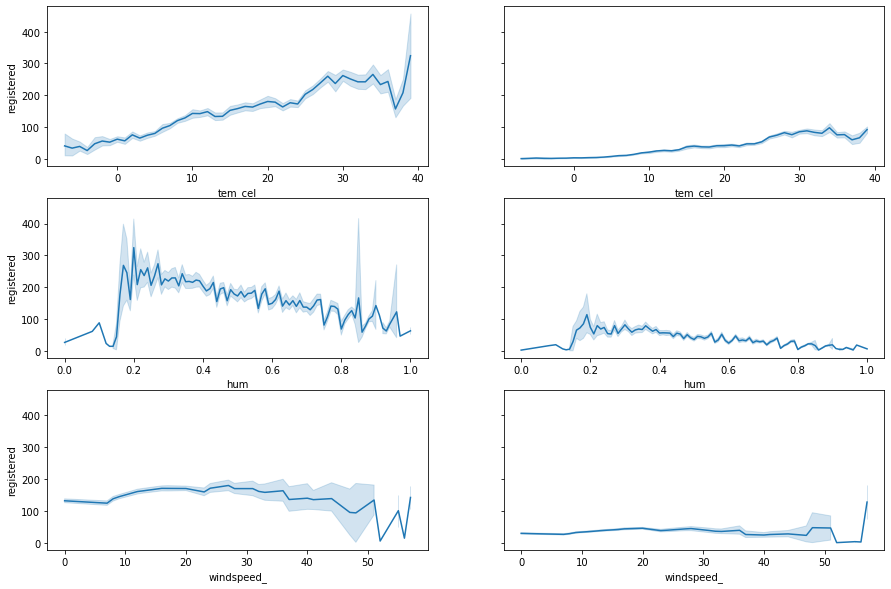

In [293]:
fig,axs=plt.subplots(3,2,figsize=(15,10),sharey=True)
sns.lineplot(data=hour,x="tem_cel",y="registered",palette="coolwarm",ax=axs[0,0],estimator=np.mean)
sns.lineplot(data=hour,x="tem_cel",y="casual",palette="coolwarm",ax=axs[0,1],estimator=np.mean)
sns.lineplot(data=hour,x="hum",y="registered",palette="coolwarm",ax=axs[1,0],estimator=np.mean)
sns.lineplot(data=hour,x="hum",y="casual",palette="coolwarm",ax=axs[1,1],estimator=np.mean)
sns.lineplot(data=hour,x="windspeed_",y="registered",palette="coolwarm",ax=axs[2,0],estimator=np.mean)
sns.lineplot(data=hour,x="windspeed_",y="casual",palette="coolwarm",ax=axs[2,1],estimator=np.mean)

plt.show()

Impact of the month/weekday/hour   on the amount of trips

In [294]:
hour.head(5)

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01  Winter   0     1   0        0        6           0   
1        2 2011-01-01  Winter   0     1   1        0        6           0   
2        3 2011-01-01  Winter   0     1   2        0        6           0   
3        4 2011-01-01  Winter   0     1   3        0        6           0   
4        5 2011-01-01  Winter   0     1   4        0        6           0   

   weathersit  ...  day_time  is_holiday  tem_cel  atemp_cel  windspeed_  \
0           1  ...     Night          No        4          0           0   
1           1  ...     Night          No        3         -1           0   
2           1  ...     Night          No        3         -1           0   
3           1  ...     Night          No        4          0           0   
4           1  ...     Night          No        4          0           0   

   day_name  hum_score temp_score wind_score  weather_score  
0       Sat        4.0          3          1            2.7  
1       Sat        4.0          3          1            2.7  
2       Sat        4.0          3          1            2.7  
3       Sat        3.0          3          1            2.4  
4       Sat        3.0          3          1            2.4  

[5 rows x 27 columns]

<AxesSubplot:xlabel='day_name', ylabel='registered'>

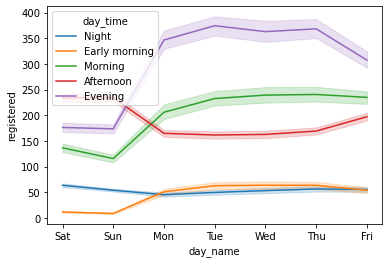

In [295]:
sns.lineplot(data=hour,x="day_name",y="registered",hue="day_time",markers=True,estimator=np.mean)

<AxesSubplot:xlabel='day_name', ylabel='casual'>

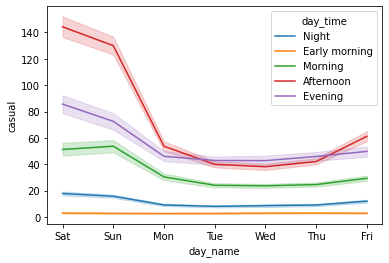

In [296]:
sns.lineplot(data=hour,x="day_name",y="casual",hue="day_time",markers=True,estimator=np.mean)

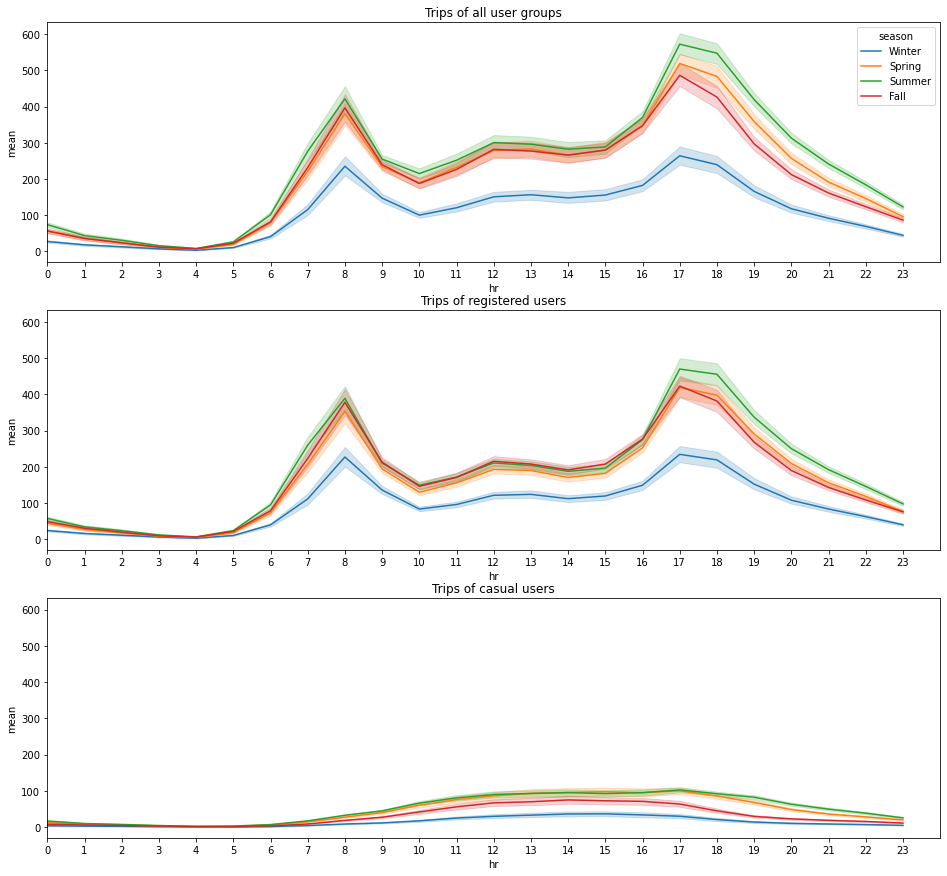

In [297]:
# The most popular hours to rent the bike 
fig,axs=plt.subplots(3,1,figsize=(16,15),sharey=True)
axs[0].set_title("Trips of all user groups")
axs[2].set_title("Trips of casual users")
axs[1].set_title("Trips of registered users")
axs[0].set(xlabel="",ylabel="mean")
axs[2].set(xlabel="",ylabel="mean")
axs[1].set(xlabel="",ylabel="mean")
axs[0].set_xlim(0,24)
axs[0].set_xticks(range(0,24))
axs[1].set_xlim(0,24)
axs[1].set_xticks(range(0,24))
axs[2].set_xlim(0,24)
axs[2].set_xticks(range(0,24))
sns.lineplot(data=hour,x="hr",y="cnt",hue="season",markers=True,estimator=np.mean,ax=axs[0])
sns.lineplot(data=hour,x="hr",y="registered",hue="season",markers=True,estimator=np.mean,ax=axs[1],legend=None)
sns.lineplot(data=hour,x="hr",y="casual",hue="season",markers=True,estimator=np.mean,ax=axs[2],legend=None)


plt.show()

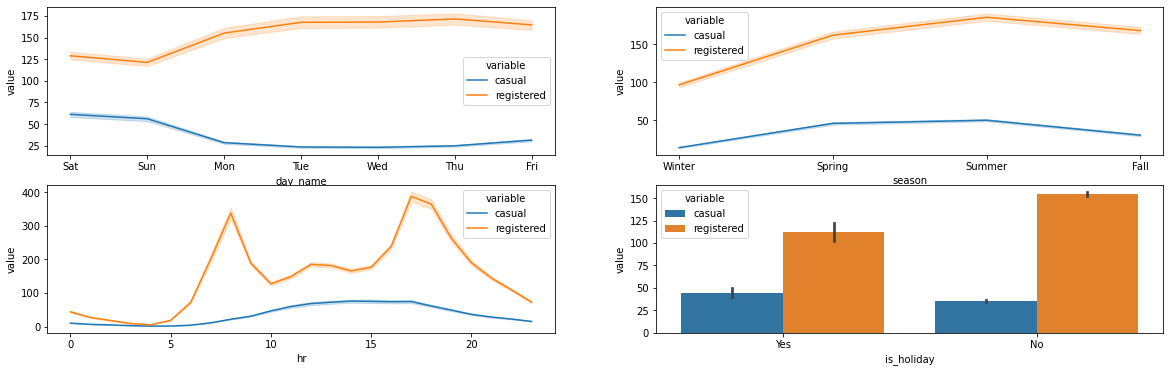

In [298]:
hours_melt=pd.melt(hour,id_vars=["instant","dteday","day_name","season","yr","mnth","hr","holiday","weekday","workingday","weathersit","tem_cel","atemp_cel","hum","windspeed_","is_holiday","weather_score","day_time"],value_vars=["casual","registered"])

fig,axs=plt.subplots(2,2,figsize=(20,6))

sns.lineplot(data=hours_melt,x="day_name",y="value",hue="variable",estimator=np.mean,ax=axs[0,0])
sns.lineplot(data=hours_melt,x="season",y="value",hue="variable",estimator=np.mean,ax=axs[0,1])
sns.lineplot(data=hours_melt,x="hr",y="value",hue="variable",estimator=np.mean,ax=axs[1,0])
sns.barplot(data=hours_melt,x="is_holiday",y="value",hue="variable",estimator=np.mean,ax=axs[1,1])
plt.show()


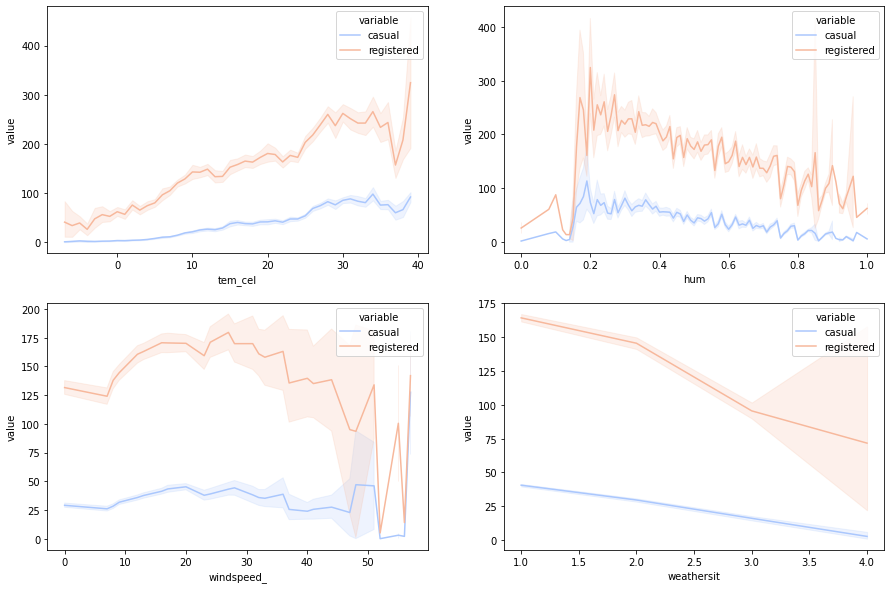

In [299]:
fig,axs=plt.subplots(2,2,figsize=(15,10))
sns.lineplot(data=hours_melt,x="tem_cel",y="value",palette="coolwarm",ax=axs[0,0],estimator=np.mean,hue="variable")
sns.lineplot(data=hours_melt,x="hum",y="value",palette="coolwarm",ax=axs[0,1],estimator=np.mean,hue="variable")
sns.lineplot(data=hours_melt,x="windspeed_",y="value",palette="coolwarm",ax=axs[1,0],estimator=np.mean,hue="variable")
sns.lineplot(data=hours_melt,x="weathersit",y="value",palette="coolwarm",ax=axs[1,1],estimator=np.mean,hue="variable")


plt.show()

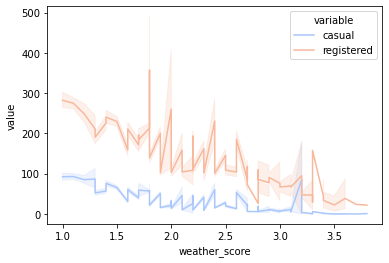

In [300]:
sns.lineplot(data=hours_melt,x="weather_score",y="value",palette="coolwarm",estimator=np.mean,hue="variable")
plt.show()

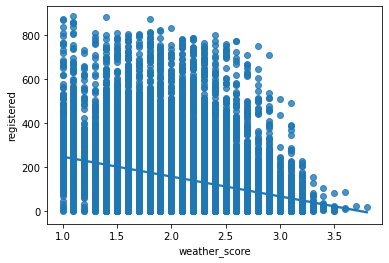

In [344]:
sns.regplot(data=hour,x="weather_score",y="registered")
plt.show()

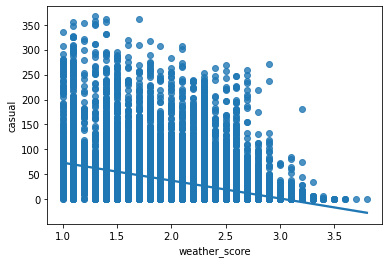

In [343]:
sns.regplot(data=hour,x="weather_score",y="casual")
plt.show()

In [ ]:
#x=hours_melt["weather_score"]
#y=hours_melt["value"]
#casual_=hours_melt[hours_melt["variable"]=="casual"]

#plt.stackplot(x,y,hours_melt[hours_melt["variable"]=="casual"],hours_melt[hours_melt["variable"]=="registered"])
#plt.legend()
#plt.show()

#hours_melt["variable"]

EDA TRIPS

In [304]:
trips.head(5)

Duration          Start date            End date  Start station number  \
0      3548 2011-01-01 00:01:29 2011-01-01 01:00:37                 31620   
1       346 2011-01-01 00:02:46 2011-01-01 00:08:32                 31105   
2       562 2011-01-01 00:06:13 2011-01-01 00:15:36                 31400   
3       434 2011-01-01 00:09:21 2011-01-01 00:16:36                 31111   
4       233 2011-01-01 00:28:26 2011-01-01 00:32:19                 31104   

                    Start station  End station number  \
0                   5th & F St NW               31620   
1            14th & Harvard St NW               31101   
2  Georgia & New Hampshire Ave NW               31104   
3                  10th & U St NW               31503   
4     Adams Mill & Columbia Rd NW               31106   

                   End station Bike number Member type  mnth  weekday  \
0                5th & F St NW      W00247  registered     1        5   
1               14th & V St NW      W00675      casual     1        5   
2  Adams Mill & Columbia Rd NW      W00357  registered     1        5   
3        Florida Ave & R St NW      W00970  registered     1        5   
4     Calvert & Biltmore St NW      W00346      casual     1        5   

      dteday  hour day_time  season day_name  holiday is_holiday  \
0 2011-01-01     0    Night  Winter      Fri        0         No   
1 2011-01-01     0    Night  Winter      Fri        0         No   
2 2011-01-01     0    Night  Winter      Fri        0         No   
3 2011-01-01     0    Night  Winter      Fri        0         No   
4 2011-01-01     0    Night  Winter      Fri        0         No   

                                               route  
0                      5th & F St NW - 5th & F St NW  
1              14th & Harvard St NW - 14th & V St NW  
2  Georgia & New Hampshire Ave NW - Adams Mill & ...  
3             10th & U St NW - Florida Ave & R St NW  
4  Adams Mill & Columbia Rd NW - Calvert & Biltmo...

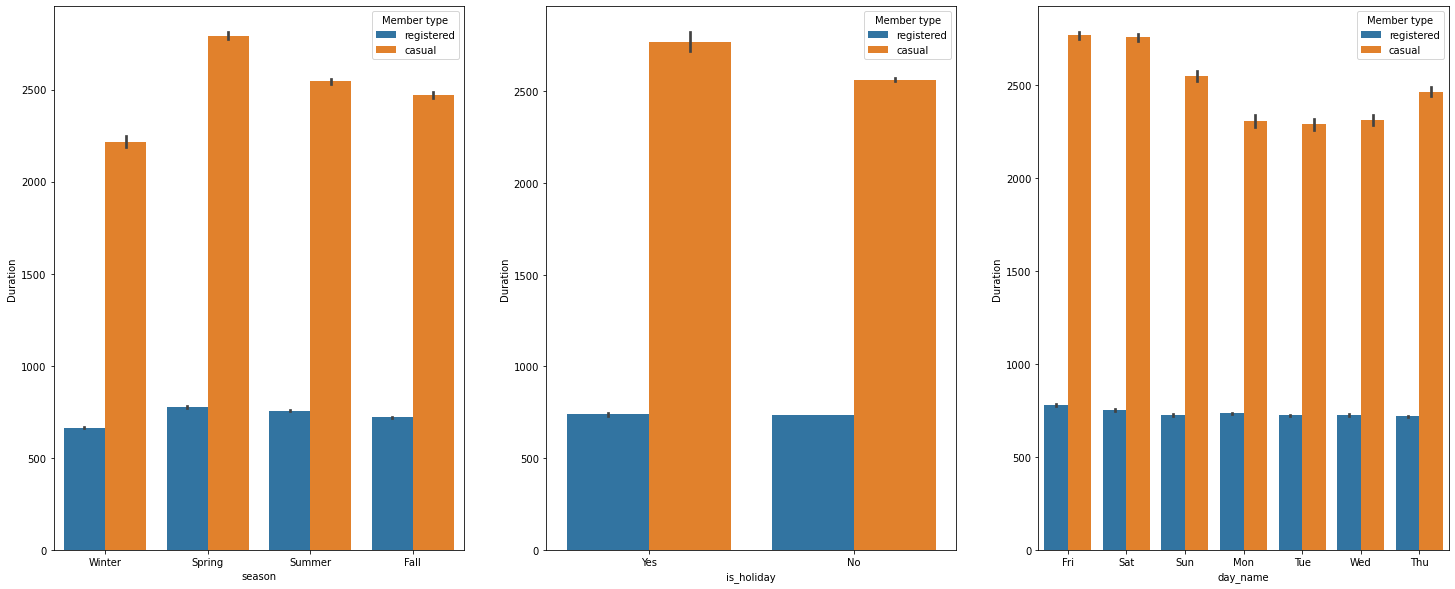

In [305]:
fig,axs=plt.subplots(1,3,figsize=(25,10))
sns.barplot(data=trips,x="season",y="Duration",estimator=np.mean,hue="Member type",ax=axs[0])
sns.barplot(data=trips,x="is_holiday",y="Duration",estimator=np.mean,hue="Member type",ax=axs[1])
sns.barplot(data=trips,x="day_name",y="Duration",estimator=np.mean,hue="Member type",ax=axs[2])
plt.show()

<AxesSubplot:xlabel='Member type', ylabel='count'>

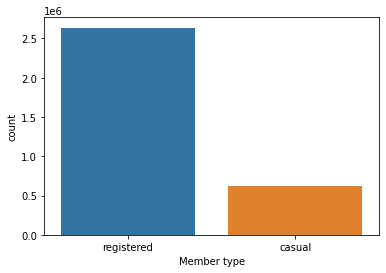

In [306]:
sns.countplot(data=trips,x="Member type")

In [ ]:
sns.countplot(data=trips,x="Member type")


Popular routs & station

Fix misspel

In [307]:
trips[trips["Start station"]=="19th & L St NW"]

Duration          Start date            End date  \
58            339 2011-01-01 02:07:30 2011-01-01 02:13:10   
514          2020 2011-01-01 15:10:54 2011-01-01 15:44:35   
521           610 2011-01-01 15:14:25 2011-01-01 15:24:36   
522           594 2011-01-01 15:14:44 2011-01-01 15:24:39   
970          2298 2011-01-02 00:37:12 2011-01-02 01:15:30   
...           ...                 ...                 ...   
3253068       347 2012-06-30 15:07:01 2012-06-30 15:12:49   
3253450       563 2012-06-30 16:02:58 2012-06-30 16:12:21   
3253571       738 2012-06-30 16:23:11 2012-06-30 16:35:29   
3253842       282 2012-06-30 17:09:56 2012-06-30 17:14:39   
3254233       307 2012-06-30 18:11:21 2012-06-30 18:16:28   

         Start station number   Start station  End station number  \
58                      31224  19th & L St NW               31100   
514                     31224  19th & L St NW               31201   
521                     31224  19th & L St NW               31206   
522                     31224  19th & L St NW               31206   
970                     31224  19th & L St NW               31204   
...                       ...             ...                 ...   
3253068                 31224  19th & L St NW               31200   
3253450                 31224  19th & L St NW               31228   
3253571                 31224  19th & L St NW               31214   
3253842                 31224  19th & L St NW               31234   
3254233                 31224  19th & L St NW               31241   

                                  End station Bike number Member type  mnth  \
58              19th St & Pennsylvania Ave NW      W00512  registered     1   
514                            15th & P St NW      W00798      casual     1   
521                        19th & E Street NW      W00722      casual     1   
522                        19th & E Street NW      W00604      casual     1   
970                            20th & E St NW      W00581      casual     1   
...                                       ...         ...         ...   ...   
3253068  Massachusetts Ave & Dupont Circle NW      W00947  registered     6   
3253450                         8th & H St NW      W00005  registered     6   
3253571                 17th & Corcoran St NW      W00928  registered     6   
3253842         20th & O St NW / Dupont South      W00190  registered     6   
3254233                         Thomas Circle      W01493  registered     6   

         weekday     dteday  hour   day_time  season day_name  holiday  \
58             5 2011-01-01     2      Night  Winter      Fri        0   
514            5 2011-01-01    15  Afternoon  Winter      Fri        0   
521            5 2011-01-01    15  Afternoon  Winter      Fri        0   
522            5 2011-01-01    15  Afternoon  Winter      Fri        0   
970            6 2011-01-02     0      Night  Winter      Sat        0   
...          ...        ...   ...        ...     ...      ...      ...   
3253068        5 2012-06-30    15  Afternoon  Summer      Fri        0   
3253450        5 2012-06-30    16  Afternoon  Summer      Fri        0   
3253571        5 2012-06-30    16  Afternoon  Summer      Fri        0   
3253842        5 2012-06-30    17    Evening  Summer      Fri        0   
3254233        5 2012-06-30    18    Evening  Summer      Fri        0   

        is_holiday                                              route  
58              No     19th & L St NW - 19th St & Pennsylvania Ave NW  
514             No                    19th & L St NW - 15th & P St NW  
521             No                19th & L St NW - 19th & E Street NW  
522             No                19th & L St NW - 19th & E Street NW  
970             No                    19th & L St NW - 20th & E St NW  
...            ...                                                ...  
3253068         No  19th & L St NW - Massachusetts Ave & Dupont Ci...  
3253450         No               

In [308]:
#Fix misspel in Station name
trips.loc[trips["Start station number"]==31619,"Start station"]="Lincoln Park / 13th & East Capitol St NE"


In [309]:
#Fix misspel in Station name
trips.loc[trips["End station number"]==31619,"End station"]="Lincoln Park / 13th & East Capitol St NE"

In [310]:
label=["Route","Count"]
routes_list=trips["route"].value_counts(dropna=False).rename_axis("Route").reset_index(name='Count')

TOP STATIONS

In [311]:
# Data frames for different day time
registered_morning=trips[(trips["day_time"]=="Morning")&(trips["Member type"]=="registered")]
registered_evening=trips[(trips["day_time"]=="Evening")&(trips["Member type"]=="registered")]
casual_afternoon=trips[(trips["day_time"]=="Afternoon")&(trips["Member type"]=="casual")]
casual_evening=trips[(trips["day_time"]=="Evening")&(trips["Member type"]=="casual")]

In [312]:
#TOP 50 START STATIONS WITH TIME
trips.groupby(["Start station","day_time"]).count()

Duration  Start date  End date  \
Start station                day_time                                        
10th & E St NW               Afternoon          2158        2158      2158   
                             Early morning        14          14        14   
                             Evening            2360        2360      2360   
                             Morning             839         839       839   
                             Night               909         909       909   
...                                              ...         ...       ...   
Wisconsin Ave & Newark St NW Afternoon          4078        4078      4078   
                             Early morning       628         628       628   
                             Evening            3572        3572      3572   
                             Morning            6021        6021      6021   
                             Night              1448        1448      1448   

                                            Start station number  \
Start station                day_time                              
10th & E St NW               Afternoon                      2158   
                             Early morning                    14   
                             Evening                        2360   
                             Morning                         839   
                             Night                           909   
...                                                          ...   
Wisconsin Ave & Newark St NW Afternoon                      4078   
                             Early morning                   628   
                             Evening                        3572   
                             Morning                        6021   
                             Night                          1448   

                                            End station number  End station  \
Start station                day_time                                         
10th & E St NW               Afternoon                    2158         2158   
                             Early morning                  14           14   
                             Evening                      2360         2360   
                             Morning                       839          839   
                             Night                         909          909   
...                                                        ...          ...   
Wisconsin Ave & Newark St NW Afternoon                    4078         4078   
                             Early morning                 628          628   
                             Evening                      3572         3572   
                             Morning                      6021         6021   
                             Night                        1448         1448   

                                            Bike number  Member type  mnth  \
Start station                day_time                                        
10th & E St NW               Afternoon             2158         2158  2158   
                             Early morning           14           14    14   
                             Evening               2360         2360  2360   
                             Morning                839          839   839   
                             Night                  909          909   909   
...                                                 ...          ...   ...   
Wisconsin Ave & Newark St NW Afternoon             4078         4078  4078   
                             Early morning          628          628   628   
                             Evening               3572         3572  3572   
                             Morning               6021         6021  6021   
                             Night                 1448         1448  1448   

                                            weekday  dteday  hour  season  \
Start station           

In [350]:
trips.groupby(["Bike number","Start date","End date"]).count()

Duration  \
Bike number           Start date          End date                        
?(0x0000000026B3BBA8) 2011-01-06 10:21:18 2011-01-06 10:40:47         1   
                      2011-01-06 23:23:59 2011-01-06 23:33:16         1   
                      2011-01-07 07:54:59 2011-01-07 08:20:56         1   
                      2011-01-07 08:44:05 2011-01-07 08:54:55         1   
                      2011-01-09 13:41:37 2011-01-09 13:54:51         1   
...                                                                 ...   
w01117                2012-12-29 01:59:46 2012-12-29 02:10:20         1   
                      2012-12-30 11:55:23 2012-12-30 11:57:57         1   
                      2012-12-30 12:23:12 2012-12-30 12:26:54         1   
                      2012-12-31 08:16:51 2012-12-31 08:18:00         1   
                      2012-12-31 09:39:19 2012-12-31 09:40:46         1   

                                                               Start station number  \
Bike number           Start date          End date                                    
?(0x0000000026B3BBA8) 2011-01-06 10:21:18 2011-01-06 10:40:47                     1   
                      2011-01-06 23:23:59 2011-01-06 23:33:16                     1   
                      2011-01-07 07:54:59 2011-01-07 08:20:56                     1   
                      2011-01-07 08:44:05 2011-01-07 08:54:55                     1   
                      2011-01-09 13:41:37 2011-01-09 13:54:51                     1   
...                                                                             ...   
w01117                2012-12-29 01:59:46 2012-12-29 02:10:20                     1   
                      2012-12-30 11:55:23 2012-12-30 11:57:57                     1   
                      2012-12-30 12:23:12 2012-12-30 12:26:54                     1   
                      2012-12-31 08:16:51 2012-12-31 08:18:00                     1   
                      2012-12-31 09:39:19 2012-12-31 09:40:46                     1   

                                                               Start station  \
Bike number           Start date          End date                             
?(0x0000000026B3BBA8) 2011-01-06 10:21:18 2011-01-06 10:40:47              1   
                      2011-01-06 23:23:59 2011-01-06 23:33:16              1   
                      2011-01-07 07:54:59 2011-01-07 08:20:56              1   
                      2011-01-07 08:44:05 2011-01-07 08:54:55              1   
                      2011-01-09 13:41:37 2011-01-09 13:54:51              1   
...                                                                      ...   
w01117                2012-12-29 01:59:46 2012-12-29 02:10:20              1   
                      2012-12-30 11:55:23 2012-12-30 11:57:57              1   
                      2012-12-30 12:23:12 2012-12-30 12:26:54              1   
                      2012-12-31 08:16:51 2012-12-31 08:18:00              1   
                      2012-12-31 09:39:19 2012-12-31 09:40:46              1   

                                                               End station number  \
Bike number           Start date          End date                                  
?(0x0000000026B3BBA8) 2011-01-06 10:21:18 2011-01-06 10:40:47                   1   
                      2011-01-06 23:23:59 2011-01-06 23:33:16                   1   
                      2011-01-07 07:54:59 2011-01-07 08:20:56                   1   
                      2011-01-07 08:44:05 2011-01-07 08:54:55                   1   
                      2011-01-09 13:41:37 2011-01-09 13:54:51                   1   
...                                                                           ...   
w01117                2012-12-29 01:59:46 2012-12-29 02:10:20                   1   
                      2012-12-30 11:55:23 2012-12-30 11:57:57                   1   
                      2012-12-30 12:23:12 2012-12-30 12:26:54   

**TOP 50 START STATIONS**

In [313]:
# WITHOUT DAY TIME
station_start_list=trips["Start station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
station_start_list["Station type"]="Start station"
station_start_loc=pd.merge(station_start_list,station_loc,on="NAME",how="left")
top50_start=station_start_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

In [314]:
# WITH DAY TIME

# registered_morning
start_registered_morning=registered_morning["Start station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
start_registered_morning["Station type"]="Start station"
start_registered_morning_loc=pd.merge(start_registered_morning,station_loc,on="NAME",how="left")
top50_start_registered_morning=start_registered_morning_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

# registered_evening
start_registered_evening=registered_evening["Start station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
start_registered_evening["Station type"]="Start station"
start_registered_evening_loc=pd.merge(start_registered_evening,station_loc,on="NAME",how="left")
top50_start_registered_evening=start_registered_evening_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

#casual_afternoon

start_casual_afternoon=casual_afternoon["Start station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
start_casual_afternoon["Station type"]="Start station"
start_casual_afternoon_loc=pd.merge(start_casual_afternoon,station_loc,on="NAME",how="left")
top50_start_casual_afternoon=start_casual_afternoon_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

#casual_evening

start_casual_evening=casual_evening["Start station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
start_casual_evening["Station type"]="Start station"
start_casual_evening_loc=pd.merge(start_casual_evening,station_loc,on="NAME",how="left")
top50_start_casual_evening=start_casual_evening_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]


TOP 50 END STATIONS

In [315]:
# WITHOUT DAY TIME
station_end_list=trips["End station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
station_end_list["Station type"]="End station"
station_end_loc=pd.merge(station_end_list,station_loc,on="NAME",how="left")
top50_end=station_end_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]


In [316]:
# WITH DAY TIME

# registered_morning
end_registered_morning=registered_morning["End station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
end_registered_morning["Station type"]="End station"
end_registered_morning_loc=pd.merge(end_registered_morning,station_loc,on="NAME",how="left")
top50_end_registered_morning=end_registered_morning_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

# registered_evening
end_registered_evening=registered_evening["End station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
end_registered_evening["Station type"]="End station"
end_registered_evening_loc=pd.merge(end_registered_evening,station_loc,on="NAME",how="left")
top50_end_registered_evening=end_registered_evening_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

#casual_afternoon

end_casual_afternoon=casual_afternoon["End station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
end_casual_afternoon["Station type"]="End station"
end_casual_afternoon_loc=pd.merge(end_casual_afternoon,station_loc,on="NAME",how="left")
top50_end_casual_afternoon=end_casual_afternoon_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

#casual_evening

end_casual_evening=casual_evening["End station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
end_casual_evening["Station type"]="End station"
end_casual_evening_loc=pd.merge(end_casual_evening,station_loc,on="NAME",how="left")
top50_end_casual_evening=end_casual_evening_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

In [317]:
#top50_start.to_csv("/Users/Yanaorfin/Documents/Academy/top50_start.csv",index=False)


TOP STATION LIST

In [318]:
top100_station_list=pd.concat([top50_start,top50_end],ignore_index=True,sort=True)

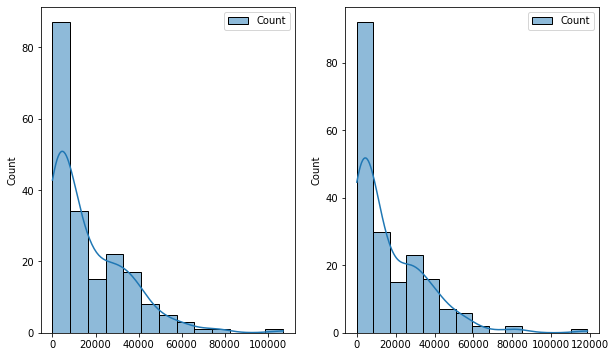

In [319]:
fig,axs=plt.subplots(1,2,figsize=(10,6))
sns.histplot(data=station_start_list,kde=True,ax=axs[0])
sns.histplot(data=station_end_list,kde=True,ax=axs[1])
plt.show()

In [320]:
top100_station_list.to_csv("/Users/Yanaorfin/Documents/Academy/top100_station_list.csv",index=False)

In [321]:
top100_station_list.head(1)

Count  LATITUDE  LONGITUDE                                  NAME  \
0  107162   38.9101   -77.0444  Massachusetts Ave & Dupont Circle NW   

     OBJECTID  STATION_ID STATION_STATUS STATION_TYPE   Station type  \
0  68794566.0        51.0         active      classic  Start station   

           X          Y  
0 -77.044404  38.910104

STATION MAP

In [322]:
map_station=folium.Map(location=[38.9072,-77.0369],zoom_start=13)

In [323]:
#top100_station_list.apply(lambda row:folium.Marker(location=[row["LATITUDE"],row["LONGITUDE"]],popup=row["NAME"]).add_to(map_station),axis=1)

In [324]:
top50_start.apply(lambda row:folium.Marker(location=[row["LATITUDE"],row["LONGITUDE"]],popup=row["NAME"],icon=folium.Icon(icon="home",prefix='fa',color='lightgreen',icon_color='green')).add_to(map_station),axis=1)
top50_end.apply(lambda row:folium.Marker(location=[row["LATITUDE"],row["LONGITUDE"]],popup=row["NAME"],icon=folium.Icon(icon="flag",prefix='fa',color='lightblue',icon_color='blue')).add_to(map_station),axis=1)

0     <folium.map.Marker object at 0x7fdb456af100>
1     <folium.map.Marker object at 0x7fdb456af400>
2     <folium.map.Marker object at 0x7fdb44a86eb0>
3     <folium.map.Marker object at 0x7fdaf5671970>
4     <folium.map.Marker object at 0x7fdaf56714c0>
5     <folium.map.Marker object at 0x7fdaf5671250>
6     <folium.map.Marker object at 0x7fdaf56711f0>
7     <folium.map.Marker object at 0x7fdaf5671880>
8     <folium.map.Marker object at 0x7fdaf5671790>
9     <folium.map.Marker object at 0x7fdaf5671580>
10    <folium.map.Marker object at 0x7fdaf5671a60>
11    <folium.map.Marker object at 0x7fdaf5671b80>
12    <folium.map.Marker object at 0x7fdaf5671c10>
13    <folium.map.Marker object at 0x7fdaf5671fd0>
14    <folium.map.Marker object at 0x7fdaf5671fa0>
15    <folium.map.Marker object at 0x7fdaf023db50>
16    <folium.map.Marker object at 0x7fdb44aa4be0>
17    <folium.map.Marker object at 0x7fdb44aa4f70>
18    <folium.map.Marker object at 0x7fdb44aa4160>
19    <folium.map.Marker object

STATION MAP REGISTERED USERS

In [325]:
map_reg_morning=folium.Map(location=[38.9072,-77.0369],zoom_start=13)
top50_start_registered_morning.apply(lambda row:folium.Marker(location=[row["LATITUDE"],row["LONGITUDE"]],popup=row["NAME"],icon=folium.Icon(icon="home",prefix='fa',color='lightgreen',icon_color='green')).add_to(map_reg),axis=1)
top50_end_registered_morning.apply(lambda row:folium.Marker(location=[row["LATITUDE"],row["LONGITUDE"]],popup=row["NAME"],icon=folium.Icon(icon="flag",prefix='fa',color='lightblue',icon_color='blue')).add_to(map_reg),axis=1)

0     <folium.map.Marker object at 0x7fdaf1c64fa0>
1     <folium.map.Marker object at 0x7fdaf1c64730>
2     <folium.map.Marker object at 0x7fdaf1c641f0>
3     <folium.map.Marker object at 0x7fdaf1c64160>
4     <folium.map.Marker object at 0x7fdaf1c64040>
5     <folium.map.Marker object at 0x7fdaf1c64fd0>
6     <folium.map.Marker object at 0x7fdaf1c64a90>
7     <folium.map.Marker object at 0x7fdaf1c64b50>
8     <folium.map.Marker object at 0x7fdaf1c64c70>
9     <folium.map.Marker object at 0x7fdaf1c65ac0>
10    <folium.map.Marker object at 0x7fdaf1c65520>
11    <folium.map.Marker object at 0x7fdaf1c65c70>
12    <folium.map.Marker object at 0x7fdaf1c652e0>
13    <folium.map.Marker object at 0x7fdaf1c653a0>
14    <folium.map.Marker object at 0x7fdaf1c651f0>
15    <folium.map.Marker object at 0x7fdaf1c65970>
16    <folium.map.Marker object at 0x7fdaf1c655b0>
17    <folium.map.Marker object at 0x7fdaf1c655e0>
18    <folium.map.Marker object at 0x7fdaf1c65a60>
19    <folium.map.Marker object

In [326]:
map_reg

In [327]:
map_reg_evening=folium.Map(location=[38.9072,-77.0369],zoom_start=13)
top50_start_registered_evening.apply(lambda row:folium.Marker(location=[row["LATITUDE"],row["LONGITUDE"]],popup=row["NAME"],icon=folium.Icon(icon="home",prefix='fa',color='lightgreen',icon_color='green')).add_to(map_reg_evening),axis=1)
top50_end_registered_evening.apply(lambda row:folium.Marker(location=[row["LATITUDE"],row["LONGITUDE"]],popup=row["NAME"],icon=folium.Icon(icon="flag",prefix='fa',color='lightblue',icon_color='blue')).add_to(map_reg_evening),axis=1)

0     <folium.map.Marker object at 0x7fdaefcb8370>
1     <folium.map.Marker object at 0x7fdaefcb8dc0>
2     <folium.map.Marker object at 0x7fdaefcb8f40>
3     <folium.map.Marker object at 0x7fdaefcb8070>
4     <folium.map.Marker object at 0x7fdaefcb81f0>
5     <folium.map.Marker object at 0x7fdaefcb8790>
6     <folium.map.Marker object at 0x7fdaefcb8820>
7     <folium.map.Marker object at 0x7fdaefcb8d30>
8     <folium.map.Marker object at 0x7fdaefcb8eb0>
9     <folium.map.Marker object at 0x7fdaefcb8700>
10    <folium.map.Marker object at 0x7fdaefcb8f10>
11    <folium.map.Marker object at 0x7fdb45486c70>
12    <folium.map.Marker object at 0x7fdb45486910>
13    <folium.map.Marker object at 0x7fdb45486610>
14    <folium.map.Marker object at 0x7fdb454866d0>
15    <folium.map.Marker object at 0x7fdb45486790>
16    <folium.map.Marker object at 0x7fdb45486f70>
17    <folium.map.Marker object at 0x7fdb45486880>
18    <folium.map.Marker object at 0x7fdb45486cd0>
19    <folium.map.Marker object

In [328]:
map_reg_evening

In [329]:
map_cas_afternoon=folium.Map(location=[38.9072,-77.0369],zoom_start=13)
top50_start_casual_afternoon.apply(lambda row:folium.Marker(location=[row["LATITUDE"],row["LONGITUDE"]],popup=row["NAME"],icon=folium.Icon(icon="home",prefix='fa',color='lightgreen',icon_color='green')).add_to(map_cas_afternoon),axis=1)
top50_end_casual_afternoon.apply(lambda row:folium.Marker(location=[row["LATITUDE"],row["LONGITUDE"]],popup=row["NAME"],icon=folium.Icon(icon="flag",prefix='fa',color='lightblue',icon_color='blue')).add_to(map_cas_afternoon),axis=1)

0     <folium.map.Marker object at 0x7fdb43c1d610>
1     <folium.map.Marker object at 0x7fdb43c1d970>
2     <folium.map.Marker object at 0x7fdb43c1d9d0>
3     <folium.map.Marker object at 0x7fdb43c1d130>
4     <folium.map.Marker object at 0x7fdb43c1da60>
5     <folium.map.Marker object at 0x7fdb43c1dc10>
6     <folium.map.Marker object at 0x7fdb43c1dd60>
7     <folium.map.Marker object at 0x7fdb43c1df70>
8     <folium.map.Marker object at 0x7fdb43c1d640>
9     <folium.map.Marker object at 0x7fdb43bf3b80>
10    <folium.map.Marker object at 0x7fdb43bf3f10>
11    <folium.map.Marker object at 0x7fdb43bf3c10>
12    <folium.map.Marker object at 0x7fdb43bf31f0>
13    <folium.map.Marker object at 0x7fdb43bf31c0>
14    <folium.map.Marker object at 0x7fdb43bf33d0>
15    <folium.map.Marker object at 0x7fdb43bf3520>
16    <folium.map.Marker object at 0x7fdb43bf3730>
17    <folium.map.Marker object at 0x7fdb43bf3700>
18    <folium.map.Marker object at 0x7fdb43bf3910>
19    <folium.map.Marker object

In [330]:
map_cas_afternoon

In [331]:
map_cas_evening=folium.Map(location=[38.9072,-77.0369],zoom_start=13)
top50_start_casual_evening.apply(lambda row:folium.Marker(location=[row["LATITUDE"],row["LONGITUDE"]],popup=row["NAME"],icon=folium.Icon(icon="home",prefix='fa',color='lightgreen',icon_color='green')).add_to(map_cas_evening),axis=1)
top50_end_casual_evening.apply(lambda row:folium.Marker(location=[row["LATITUDE"],row["LONGITUDE"]],popup=row["NAME"],icon=folium.Icon(icon="flag",prefix='fa',color='lightblue',icon_color='blue')).add_to(map_cas_evening),axis=1)

0     <folium.map.Marker object at 0x7fdaf06418b0>
1     <folium.map.Marker object at 0x7fdaf0641070>
2     <folium.map.Marker object at 0x7fdaf0641370>
3     <folium.map.Marker object at 0x7fdaf0641460>
4     <folium.map.Marker object at 0x7fdaf41e71c0>
5     <folium.map.Marker object at 0x7fdaf41e7100>
6     <folium.map.Marker object at 0x7fdaf41e7bb0>
7     <folium.map.Marker object at 0x7fdaf41e7730>
8     <folium.map.Marker object at 0x7fdaf41e7c10>
9     <folium.map.Marker object at 0x7fdaf41e75b0>
10    <folium.map.Marker object at 0x7fdaf41e7640>
11    <folium.map.Marker object at 0x7fdaf41e7ca0>
12    <folium.map.Marker object at 0x7fdaf41e7610>
13    <folium.map.Marker object at 0x7fdaf41e7dc0>
14    <folium.map.Marker object at 0x7fdaf41e77c0>
15    <folium.map.Marker object at 0x7fdaf690d970>
16    <folium.map.Marker object at 0x7fdaf690d1f0>
17    <folium.map.Marker object at 0x7fdaf690d0a0>
18    <folium.map.Marker object at 0x7fdaf690d940>
19    <folium.map.Marker object

In [332]:
map_cas_evening

POPULAR ROUTES

In [333]:
popular_routes=routes_list[routes_list['Count']>=126]

In [334]:
popular_routes.sum()

Route    Eastern Market Metro / Pennsylvania Ave & 7th ...
Count                                              2809042
dtype: object

In [335]:
routes_list.describe()

Count
count  22799.000000
mean     142.799158
std      355.602179
min        1.000000
25%        4.000000
50%       27.000000
75%      126.000000
max    10205.000000

In [336]:
popular_routes.describe()

Count
count   5701.000000
mean     492.727942
std      582.662924
min      126.000000
25%      195.000000
50%      310.000000
75%      558.000000
max    10205.000000

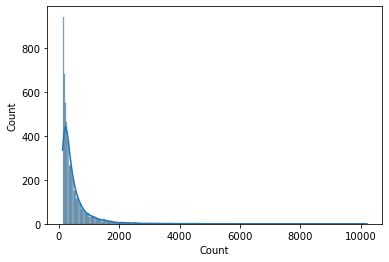

In [337]:
sns.histplot(data=popular_routes,x="Count",kde=True)
plt.show()

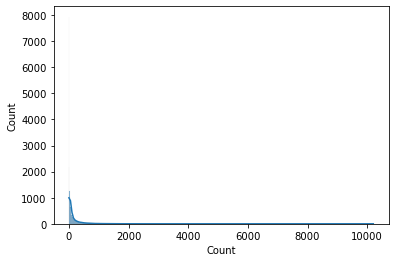

In [338]:
sns.histplot(data=routes_list,x="Count",kde=True)
plt.show()

In [339]:
popular_routes.head(30)

Route  Count
0   Eastern Market Metro / Pennsylvania Ave & 7th ...  10205
1   Adams Mill & Columbia Rd NW - Calvert & Biltmo...   9278
2   Lincoln Park / 13th & East Capitol St NE  - Ea...   8770
3   Calvert & Biltmore St NW - Adams Mill & Columb...   8722
4   Massachusetts Ave & Dupont Circle NW - 15th & ...   6713
5   New Hampshire Ave & T St NW - Massachusetts Av...   6386
6   15th & P St NW - Massachusetts Ave & Dupont Ci...   6044
7    13th & D St NE - Columbus Circle / Union Station   5801
8   Massachusetts Ave & Dupont Circle NW - New Ham...   5452
9    Columbus Circle / Union Station - 13th & D St NE   5359
10       15th & P St NW - New Hampshire Ave & T St NW   5151
11  14th & V St NW - Massachusetts Ave & Dupont Ci...   5142
12  Crystal City Metro / 18th & Bell St - 27th & C...   4944
13   Columbus Circle / Union Station - 13th & H St NE   4835
14  Lincoln Park / 13th & East Capitol St NE  - Co...   4587
15  Eastern Market Metro / Pennsylvania Ave & 7th ...   4584
16  USDA / 12th & Independence Ave SW - USDA / 12t...   4445
17  Jefferson Dr & 14th St SW - Jefferson Dr & 14t...   4388
18  Crystal City Metro / 18th & Bell St - 23rd & C...   4371
19   13th & H St NE - Columbus Circle / Union Station   4361
20  13th & D St NE - Eastern Market Metro / Pennsy...   4302
21       New Hampshire Ave & T St NW - 15th & P St NW   4246
22  Massachusetts Ave & Dupont Circle NW - 14th & ...   4160
23  Eastern Market Metro / Pennsylvania Ave & 7th ...   4152
24  19th St & Constitution Ave NW - 19th St & Cons...   4147
25  Adams Mill & Columbia Rd NW - Massachusetts Av...   4003
26             17th & Corcoran St NW - 15th & P St NW   3797
27  27th & Crystal Dr - Crystal City Metro / 18th ...   3769
28                    14th & V St NW - 15th & P St NW   3716
29             15th & P St NW - 17th & Corcoran St NW   3705

In [340]:
popular_routes.head(1000).sum()

Route    Eastern Market Metro / Pennsylvania Ave & 7th ...
Count                                              1374736
dtype: object